# Numerical solution of differential equations 
### -------------------------------------------------------------------------------------------

# 1. Euler's method
## A differential equation: $y'(t) = f(t, y(t))$ 
### can be solved as:
## $ y_{i+1}  = y_i + hf(t_i,y_i) $ 
### where, $y_i=y(t_i)$ and n+1 equidistant points: $t_0 < t_1 < t_2 < ... < t_n; h = t_1 - t_0 $
### -------------------------------------------------------------------------------------------

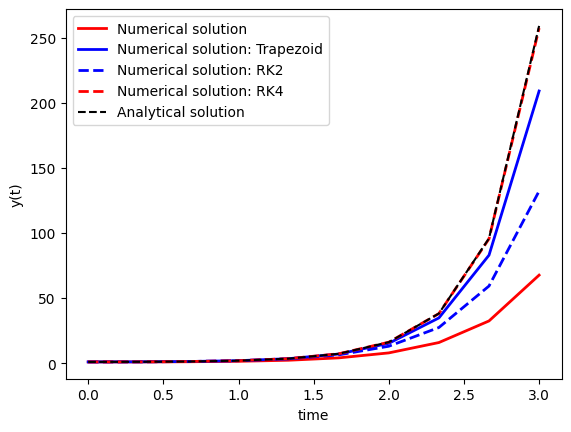

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## function defination
def f(y,t):
    return t*y+ pow(t,3)

t=np.linspace(0,3,10)

h=t[1]-t[0]
m=len(t)   # number of points
y1=np.zeros(m)
y1[0]=1
y2=np.zeros(m)
y2[0]=1
y_rk2=np.zeros(m)
y_rk2[0]=1
y_rk4=np.zeros(m)
y_rk4[0]=1

# numnerical solution
for i in range(m-1):
    y1[i+1]=y1[i]+ h*f(y1[i],t[i])   # simple Euler's method
    y2[i+1]=y2[i]+ 0.5*h*(f(y2[i],t[i]) + f(y2[i] + h*f(y2[i], t[i]),t[i]+h))   # Improved Euler's method (Trapezoid)
    y_rk2[i+1]=y_rk2[i]+ h*f(y_rk2[i] + 0.5*h*y_rk2[i], t[i]+ 0.5*h)   # RK2
        
    s1=f(y_rk4[i],t[i])
    s2=f(y_rk4[i] + s1*h*0.5 , t[i] + 0.5*h)
    s3=f(y_rk4[i] + s2*h*0.5 , t[i] + 0.5*h)
    s4=f(y_rk4[i] + s3*h , t[i] + h)
    
    y_rk4[i+1]=y_rk4[i]+ (h/6)*(s1 + 2*s2 + 2*s3 + s4)   # RK4

y_a=-t*t - 2 + 3*np.exp(t*t/2)   # analytical solution

plt.plot(t,y1, color='r', linewidth =2, label="Numerical solution")     
plt.plot(t,y2, color='b', linewidth =2, label="Numerical solution: Trapezoid")  
plt.plot(t,y_rk2,'--', color='b', linewidth =2, label="Numerical solution: RK2")
plt.plot(t,y_rk4,'--', color='r', linewidth =2, label="Numerical solution: RK4")
plt.plot(t,y_a,'--', color= 'black', label="Analytical solution")      
plt.xlabel("time")
plt.ylabel("y(t)")
plt.legend()
plt.show()

# 2. Improved Euler's method
## $ y_{i+1}  = y_i + \frac{h}{2}[f(t_i,y_i) + f(t_i+h, y_i+hf(t_i,y_i)) ] $ 
### -------------------------------------------------------------------------------------------

# 3. 2nd order Runge-Kutta (RK) method
## $ y_{i+1}  = y_i + hf(t_i+\frac{h}{2}, y_i+\frac{h}{2}f(t_i,y_i))  $ 
### -------------------------------------------------------------------------------------------

# 4. 4th order Runge-Kutta (RK) method
## $ y_{i+1}  = y_i + \frac{h}{6}(s_1 + 2s_2 + 2s_3 + s_4)  $ 
### where: $s_1 = f(t_i, y_i)$
###  $s_2 = f(t_i + \frac{h}{2}, y_i + \frac{h}{2}s_1)$
###  $s_3 = f(t_i + \frac{h}{2}, y_i + \frac{h}{2}s_2)$
###  $s_4 = f(t_i + h, y_i + hs_3)$


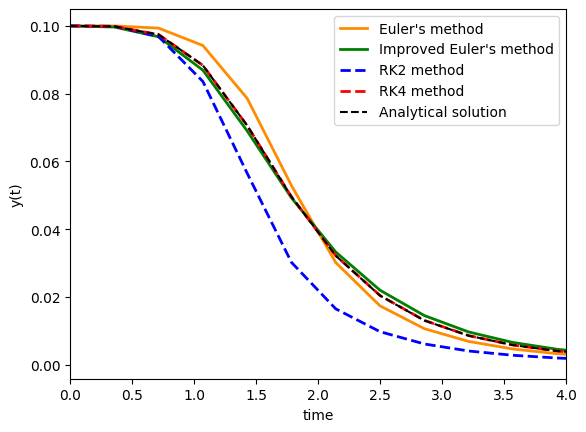

In [20]:
import numpy as np
import matplotlib.pyplot as plt

## differential equation 
def f(y,t):
   return -4*t*t*t*y*y

t=np.linspace(0,5,15)   # time

h=t[1]-t[0]

n=len(t)
y_Euler=np.zeros(n)
y_imp_Euler=np.zeros(n)
y_RK2=np.zeros(n)
y_RK4=np.zeros(n)

# initial condition
y_Euler[0]=0.1
y_imp_Euler[0]=0.1
y_RK2[0]=0.1
y_RK4[0]=0.1


for i in range(n-1):
    y_Euler[i+1]=y_Euler[i]+ h*f(y_Euler[i],t[i])                      #  Euler's method 
    
    y_imp_Euler[i+1] = y_imp_Euler[i] + 0.5*h*(f(y_imp_Euler[i],t[i]) + \
                        f(y_imp_Euler[i] + h*f(y_imp_Euler[i],t[i]), t[i]+h)) # Improved Euler's method (Trapezoid)
 
    y_RK2[i+1]=y_RK2[i]+ h*f(y_RK2[i] + 0.5*h*y_RK2[i], t[i]+ 0.5*h)   # RK2
    
    s1=f(y_RK4[i],t[i])
    s2=f(y_RK4[i] + s1*h*0.5 , t[i] + 0.5*h)
    s3=f(y_RK4[i] + s2*h*0.5 , t[i] + 0.5*h)
    s4=f(y_RK4[i] + s3*h , t[i] + h)
    
    y_RK4[i+1]=y_RK4[i]+ (h/6)*(s1 + 2*s2 + 2*s3 + s4)   # RK4


y_a=1/(t**4 + 10)   # analytical solution


plt.plot(t,y_Euler, color='darkorange', linewidth =2, label="Euler's method")  
plt.plot(t,y_imp_Euler, color='g', linewidth =2, label="Improved Euler's method") 
plt.plot(t,y_RK2,'--', color='b', linewidth =2, label="RK2 method")
plt.plot(t,y_RK4,'--', color='r', linewidth =2, label="RK4 method")
plt.plot(t,y_a,'--', color= 'black', label="Analytical solution")      
plt.xlabel("time")
plt.ylabel("y(t)")
plt.xlim(0,4)
plt.legend()
plt.show()
